In [3]:
import pandas as pd
import numpy as np
import ruptures as rpt
import matplotlib.pyplot as plt
import eia
%matplotlib notebook

In [2]:
# Get the API Key that every user needs to create
with open('eia_api_key.txt', 'r') as f:
    api_key = f.read()

Example taken from
https://techrando.com/2019/08/14/a-brief-introduction-to-change-point-detection-using-python/

<IPython.core.display.Javascript object>


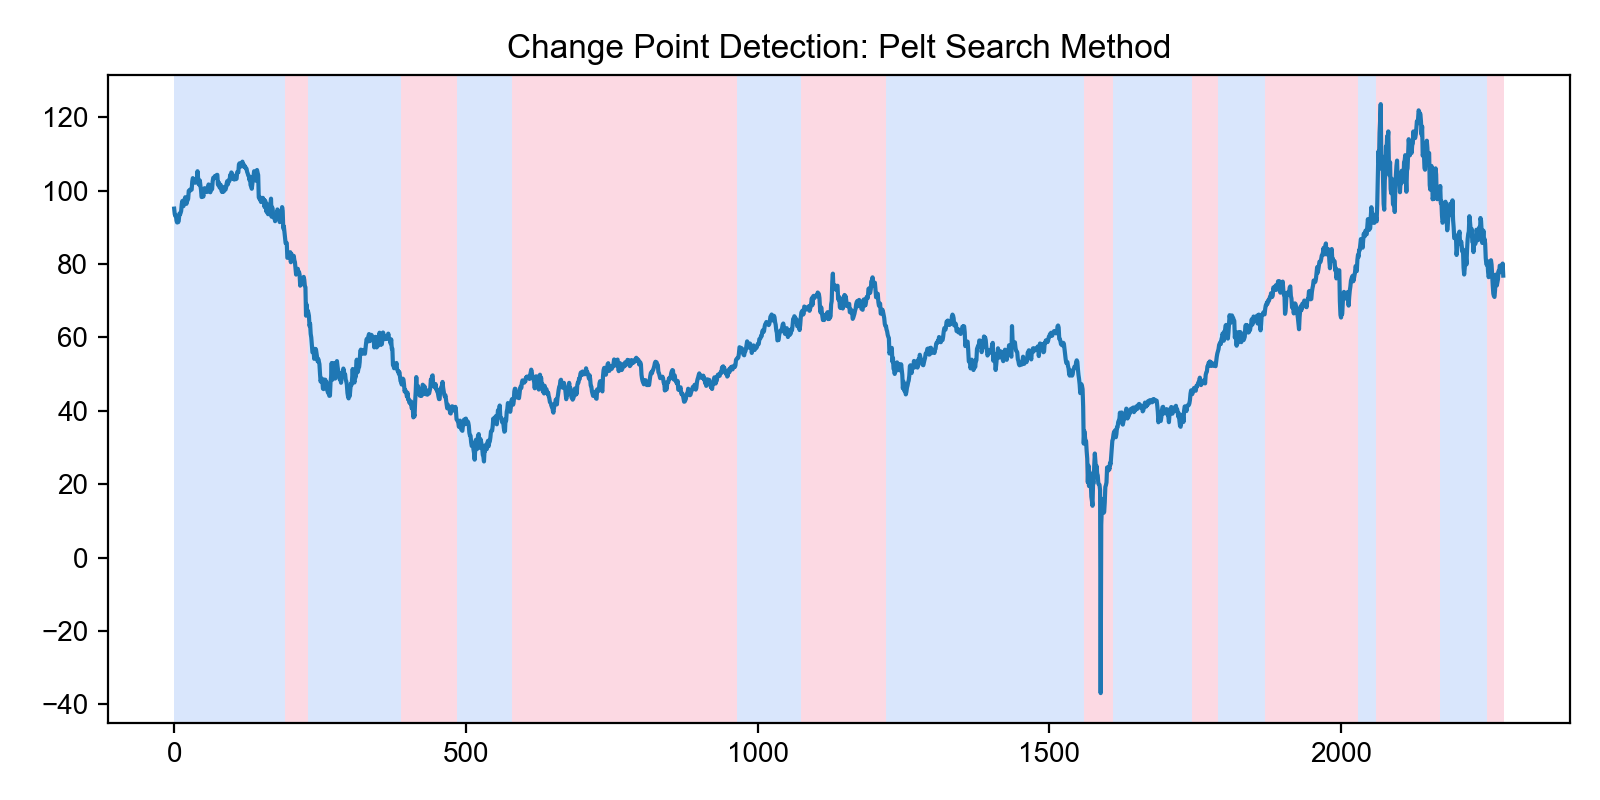

In [3]:
def retrieve_time_series(api, series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    api: API that we're connected to
    series_ID: string. Name of the series that we want to pull from the EIA API
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=series_ID)
    ##Create a pandas dataframe from the retrieved time series
    df = pd.DataFrame(series_search)
    return df


"""
Execution in main block
"""

#Create EIA API using your specific API key
api = eia.API(api_key)
    
#Pull the oil WTI price data
series_ID='PET.RWTC.D'
price_df=retrieve_time_series(api, series_ID)
price_df.reset_index(level=0, inplace=True)
#Rename the columns for easier analysis
price_df.rename(columns={'index':'Date',
            price_df.columns[1]:'WTI_Price'}, 
            inplace=True)
#Format the 'Date' column 
price_df['Date']=price_df['Date'].astype(str).str[:-3]
#Convert the Date column into a date object
price_df['Date']=pd.to_datetime(price_df['Date'], format='%Y %m%d')
#Subset to only include data going back to 2014
price_df=price_df[(price_df['Date']>='2014-01-01')]

#Convert the time series values to a numpy 1D array
points=np.array(price_df['WTI_Price'])
    
#RUPTURES PACKAGE
"""
#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.show()
    
#Changepoint detection with window-based search method
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()

#Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.show()
"""
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(8, 4))
plt.title('Change Point Detection: Pelt Search Method')
plt.tight_layout()
plt.show()  


[   0  215  435  505  780  870 1000]


<IPython.core.display.Javascript object>


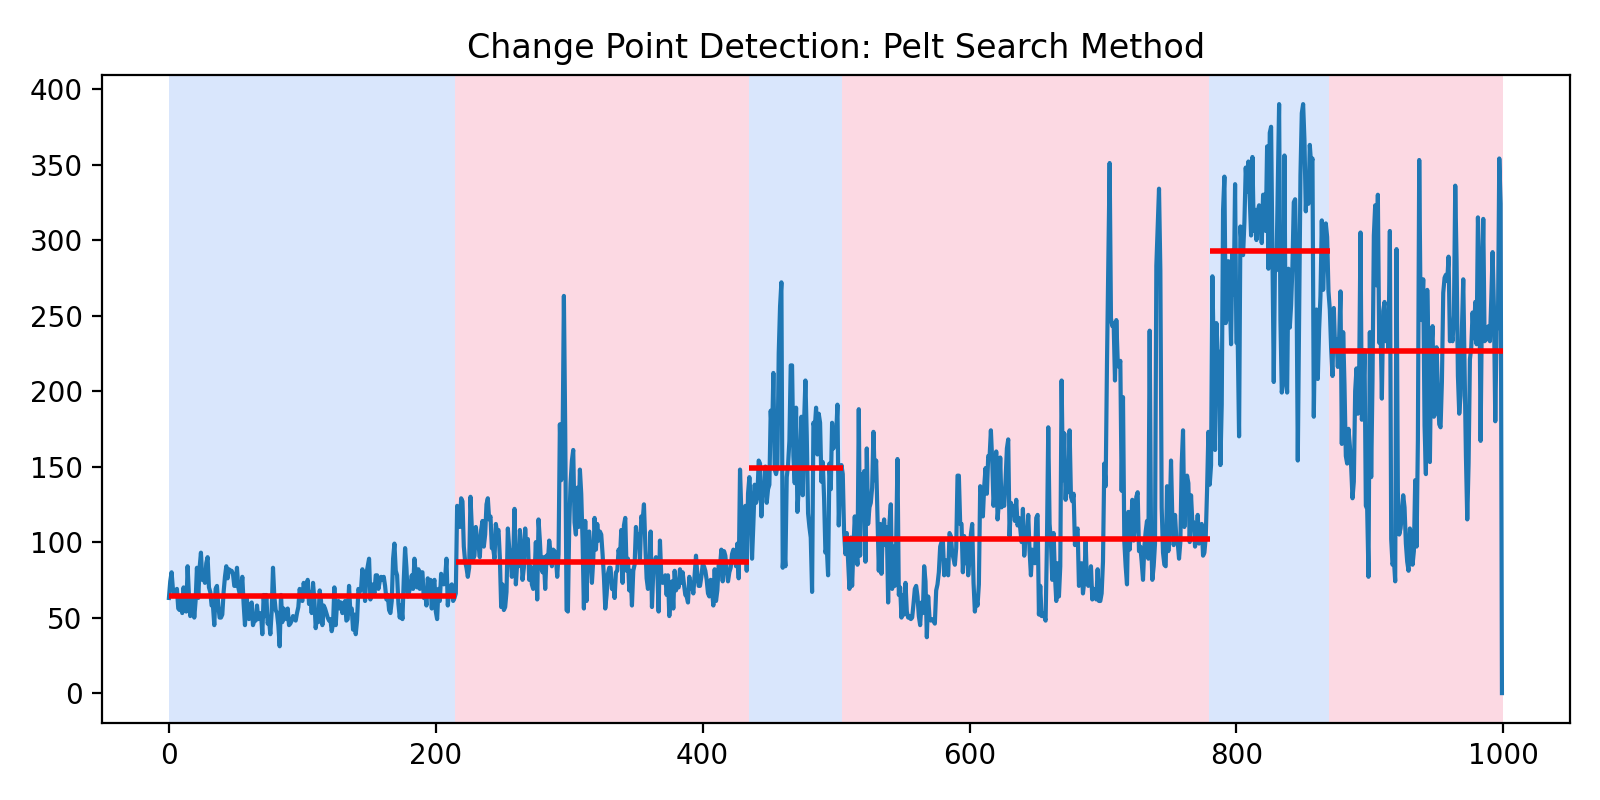

In [7]:
df_temp = pd.read_csv("Data/AP-3-120_C1x10-6_SingleDot_2,5x10+6Hz_405exct_250nW_ptu_x_77_y93_z124_range30_pts150_Particle_12_x90y_95_csvIntTrace.csv")
df = pd.DataFrame()
df["x"] = df_temp.x[::3]
df["y"] = df_temp.y[::3]
points = df.y.values
    
#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)

#pad result with the start value of df.x 
result_array = np.insert(result, 0, np.min(df.x), axis=0)
print(result_array)

rpt.display(points, result, figsize=(8, 4))
plt.title('Change Point Detection: Pelt Search Method')

for i in range(0, np.size(result_array) -1):
    i_start = result_array[i]
    i_end = result_array[i+1]
    plt.hlines(y=np.median(df.y[i_start:i_end]), xmin=i_start, xmax=i_end, linewidth=2, color='r')

plt.tight_layout()
plt.show()  

<IPython.core.display.Javascript object>


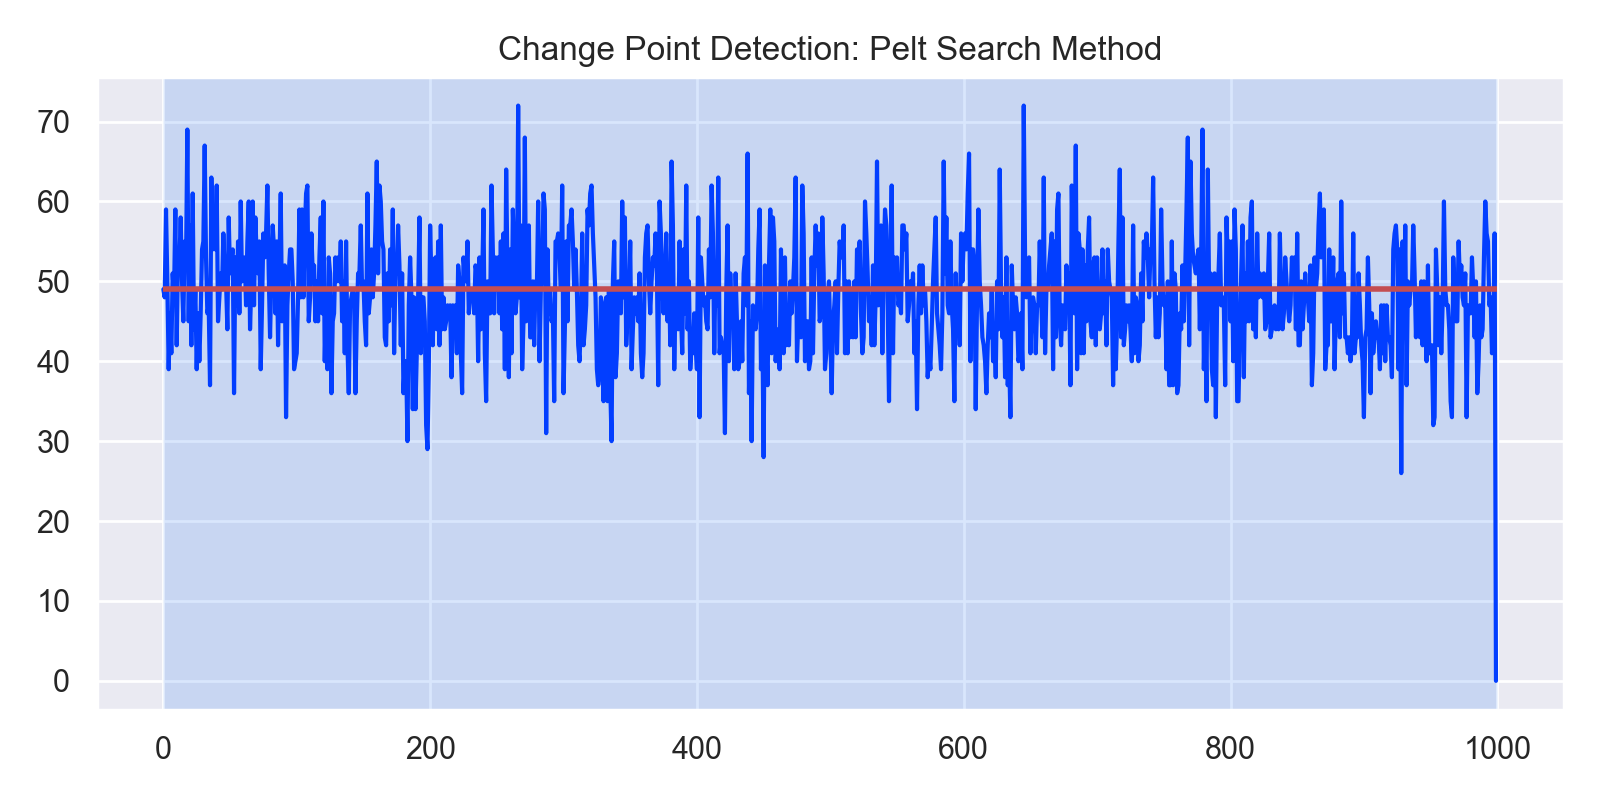

In [32]:
count_levels

array([49.])

In [9]:
df.x[7498:7499]

Series([], Name: x, dtype: float64)

In [10]:
import seaborn as sns
sns.set()
sns.set_palette("bright")
palette = sns.color_palette("bright")
palette

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [31]:
result_array

array([   0, 1000])

<IPython.core.display.Javascript object>


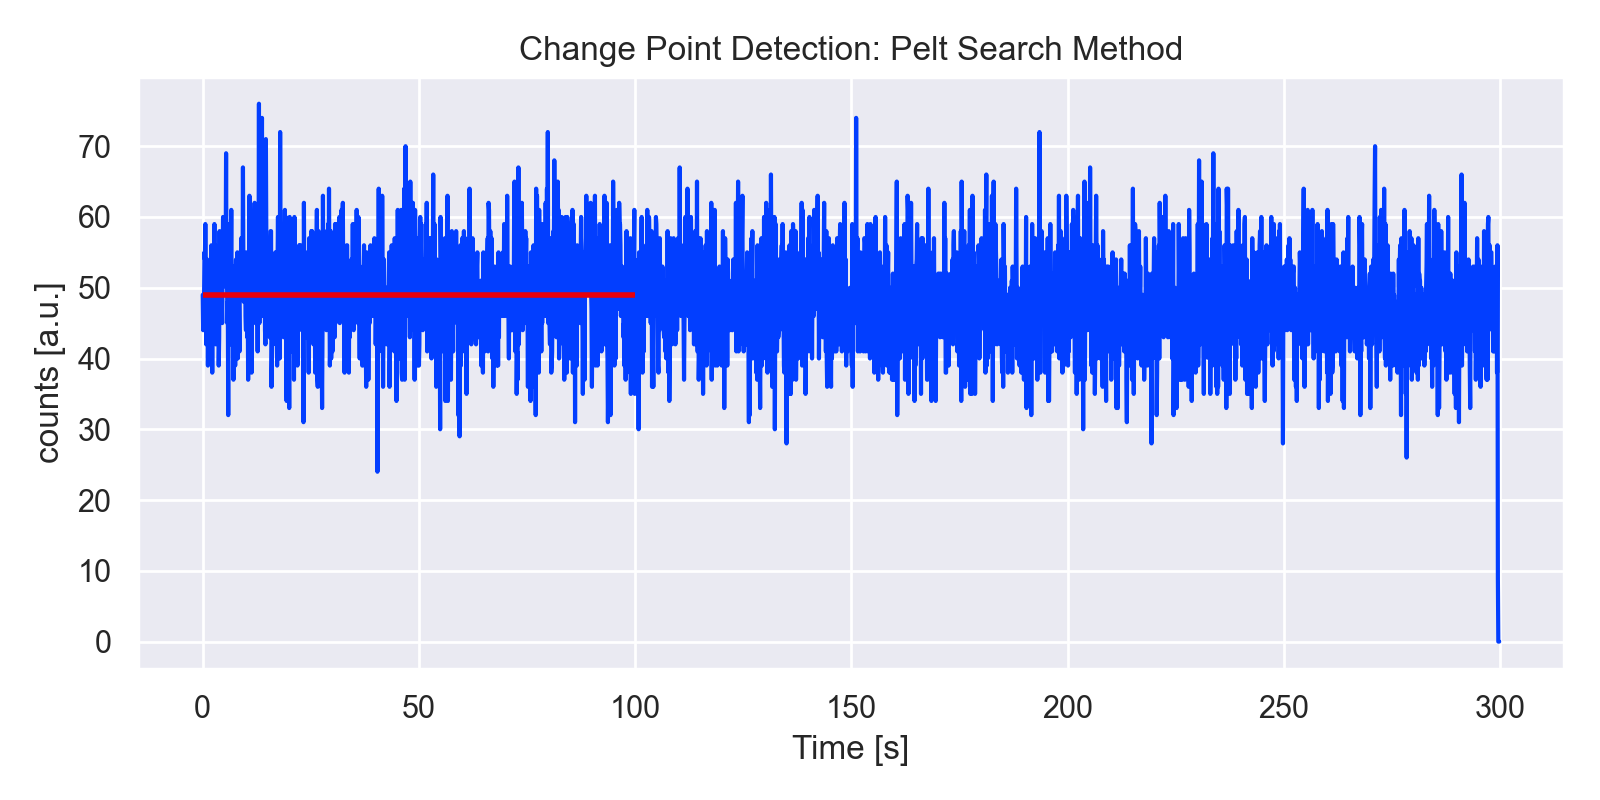

In [30]:
count_levels = np.zeros(np.size(result_array) -1)
df_res = pd.DataFrame()

fig = plt.figure(figsize=(8, 4))
plt.plot(df.x, df.y, color = palette[0])
plt.title('Change Point Detection: Pelt Search Method')

for i in range(0, np.size(result_array)-1):
    i_start = result_array[i]
    i_end = result_array[i+1]-1
    count_levels[i] = np.median(df.y[i_start:i_end])
    df_res.at[i, 'median_levels'] = np.median(df.y[i_start:i_end])
    df_res.at[i, 'i_start'] = i_start
    df_res.at[i, 'i_end'] = i_end
    df_res.at[i, 't_start'] = df.x[i_start]
    df_res.at[i, 't_end'] = df.x[i_end]
    df_res.at[i, 'time_diff'] = df.x[i_end] - df.x[i_start]
    
    
    plt.hlines(y=df_res.median_levels[i], xmin=df.x[i_start], xmax=df.x[i_end], linewidth=2, 
               color = palette[3])

plt.ylabel("counts [a.u.]")
plt.xlabel("Time [s]")
plt.tight_layout()
plt.show()  

In [12]:
df_res.sort_values("median_levels", ascending = False)

,median_levels,i_start,i_end,t_start,t_end,time_diff
1,293.0,150.0,209.0,15.0,20.9,5.9
4,278.0,445.0,634.0,44.5,63.4,18.9
8,273.0,1060.0,1174.0,106.0,117.4,11.4
16,214.0,2815.0,2998.0,281.5,299.8,18.3
12,202.0,2260.0,2459.0,226.0,245.9,19.9
3,197.0,235.0,444.0,23.5,44.4,20.9
9,189.0,1175.0,1804.0,117.5,180.4,62.9
5,185.0,635.0,884.0,63.5,88.4,24.9
7,180.5,925.0,1059.0,92.5,105.9,13.4
11,174.0,1995.0,2259.0,199.5,225.9,26.4


In [13]:
df_res.median_levels[i]

214.0

<IPython.core.display.Javascript object>


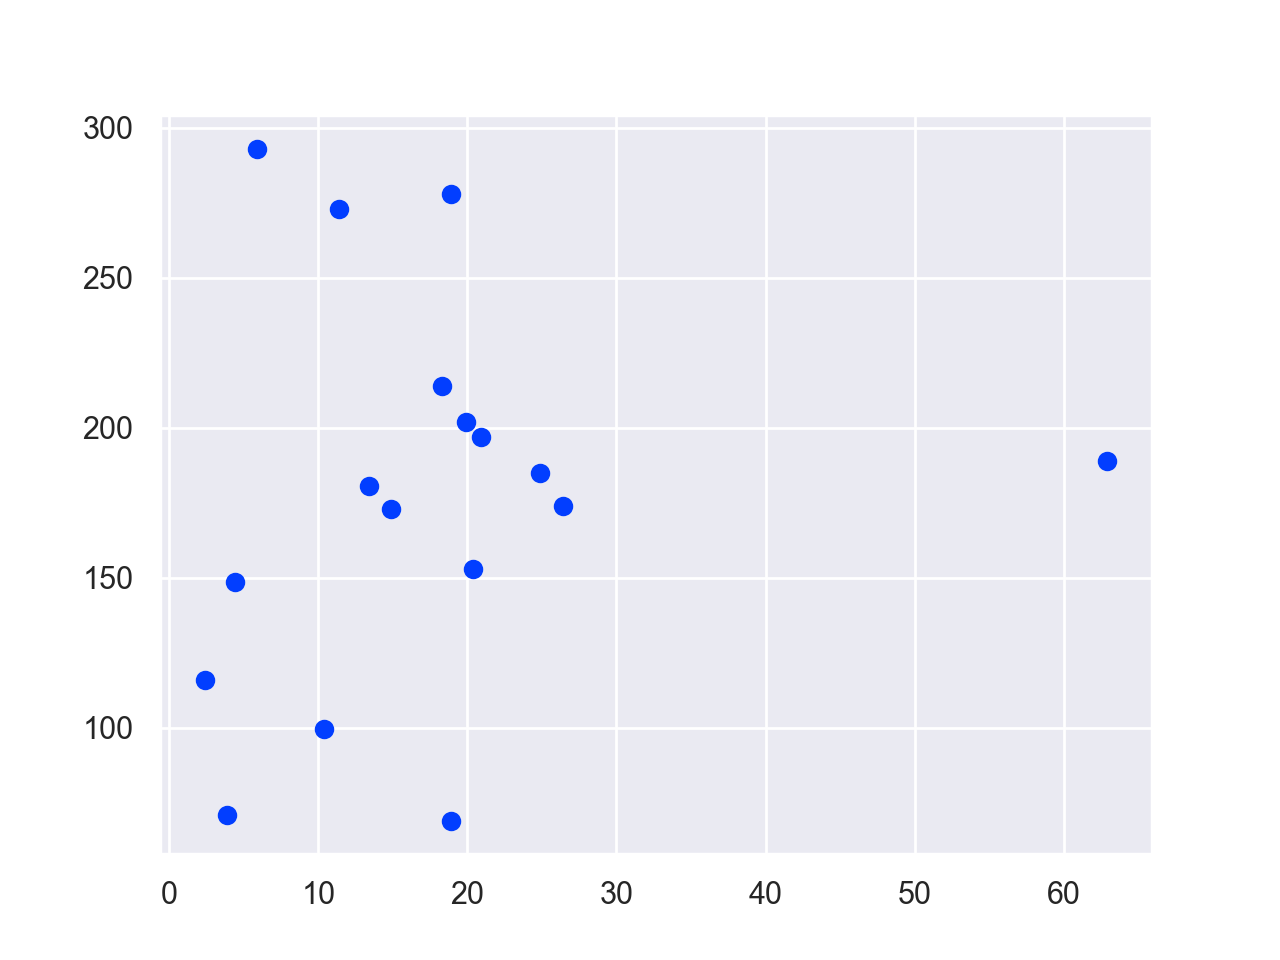

In [14]:
fig = plt.figure()
plt.plot(df_res.time_diff, df_res.median_levels, "o")

In [15]:
np.sort(count_levels)

array([ 69. ,  71. ,  99.5, 116. , 148.5, 153. , 173. , 174. , 180.5,
       185. , 189. , 197. , 202. , 214. , 273. , 278. , 293. ])

<IPython.core.display.Javascript object>


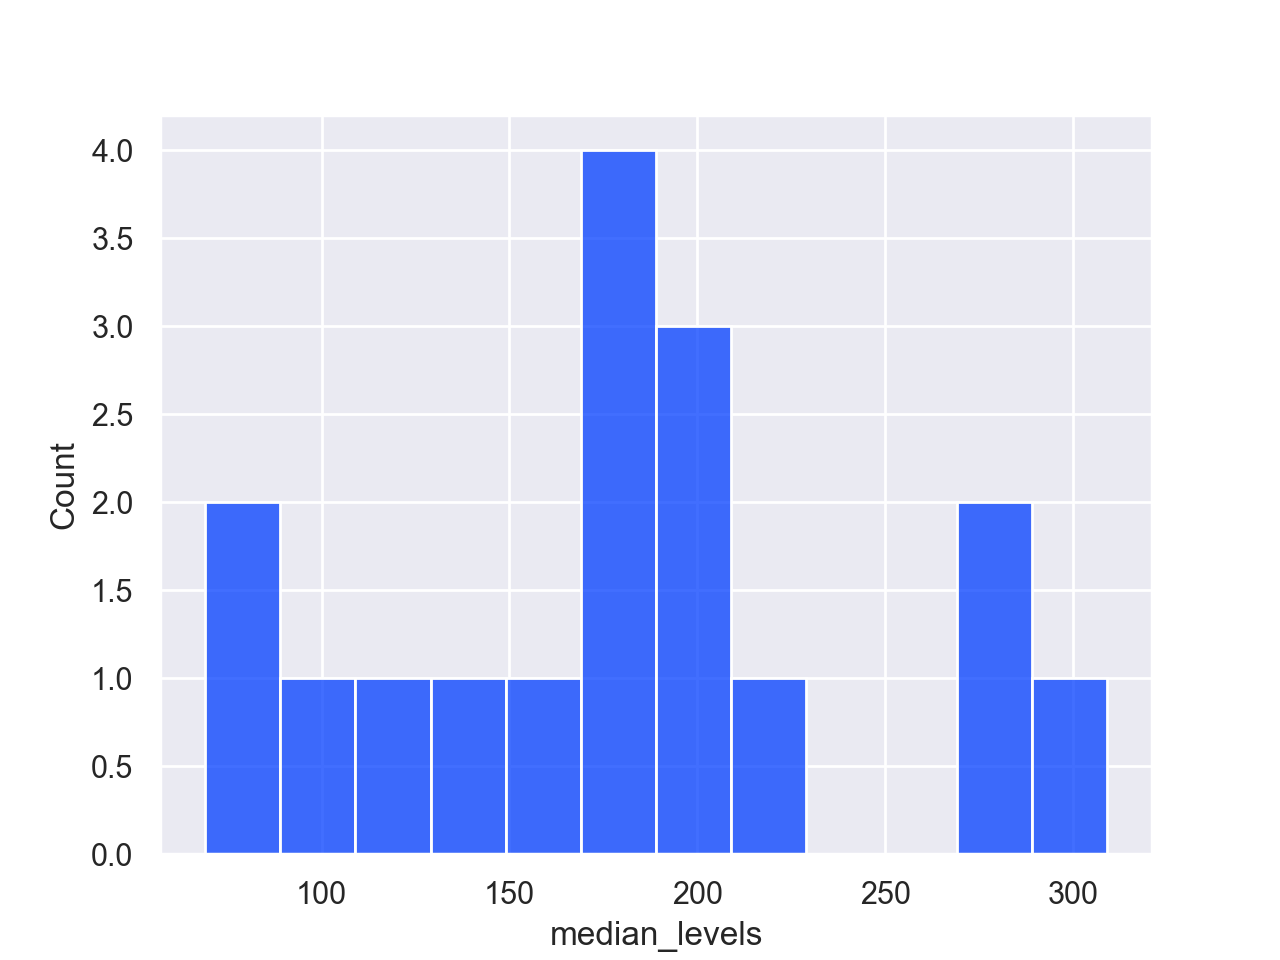

In [16]:
plt.figure()
sns.histplot(df_res[df_res.time_diff > 2].median_levels, binwidth=20)
plt.show()

<IPython.core.display.Javascript object>


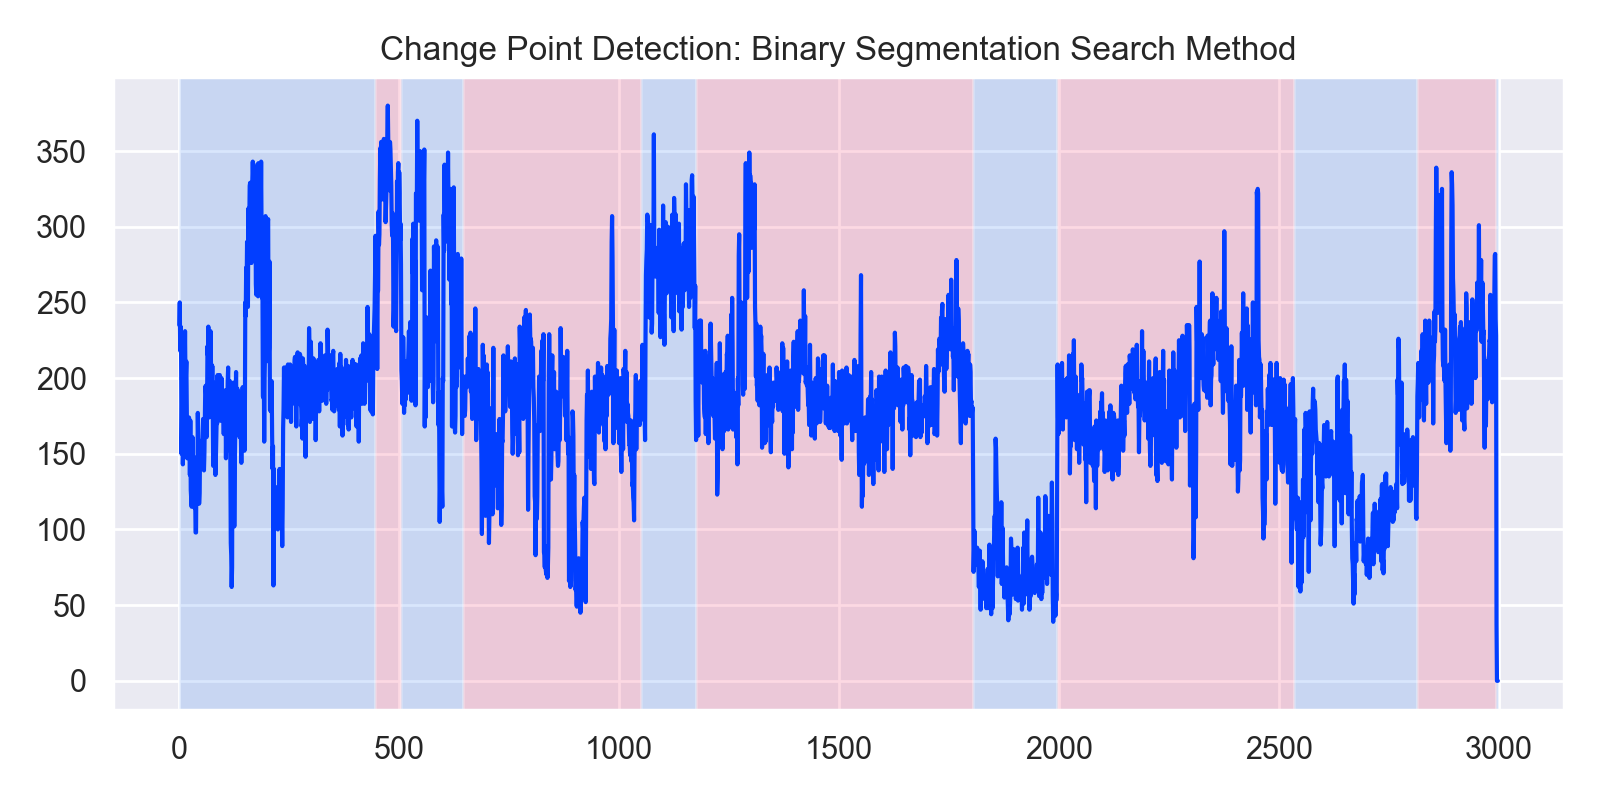

<IPython.core.display.Javascript object>


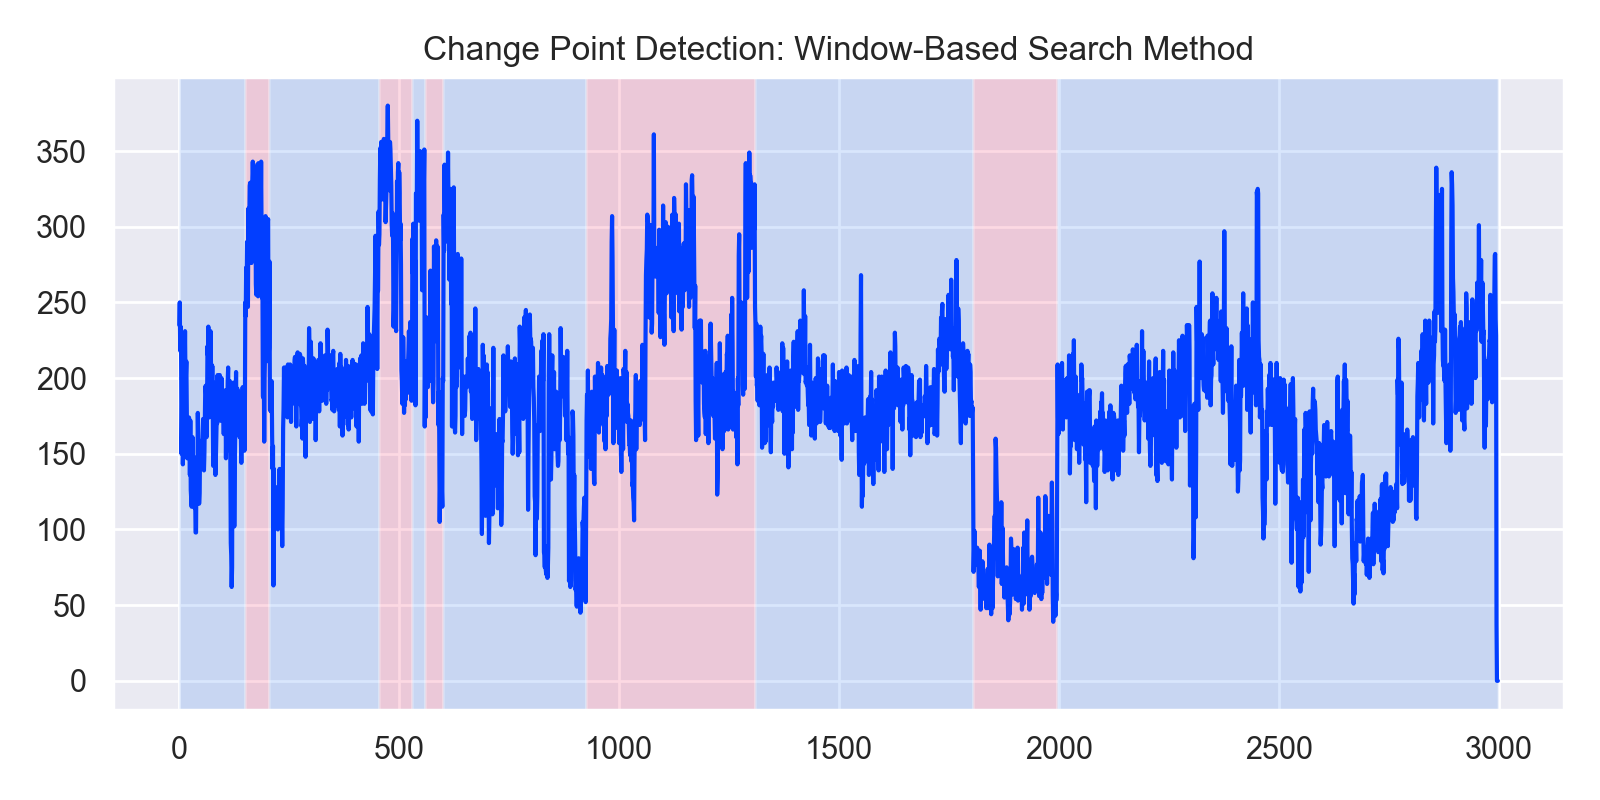

<IPython.core.display.Javascript object>


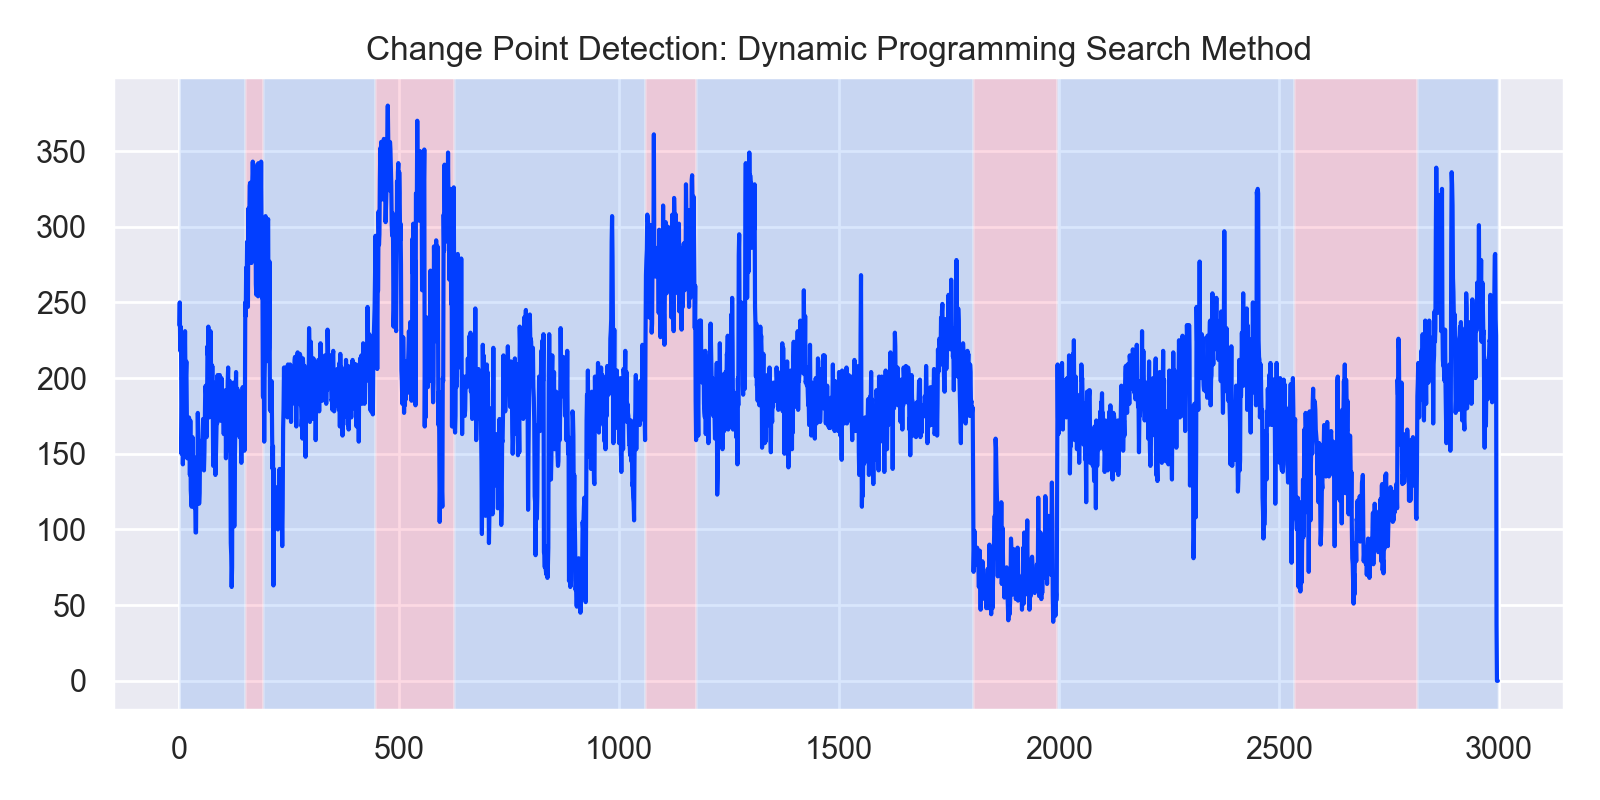

<IPython.core.display.Javascript object>


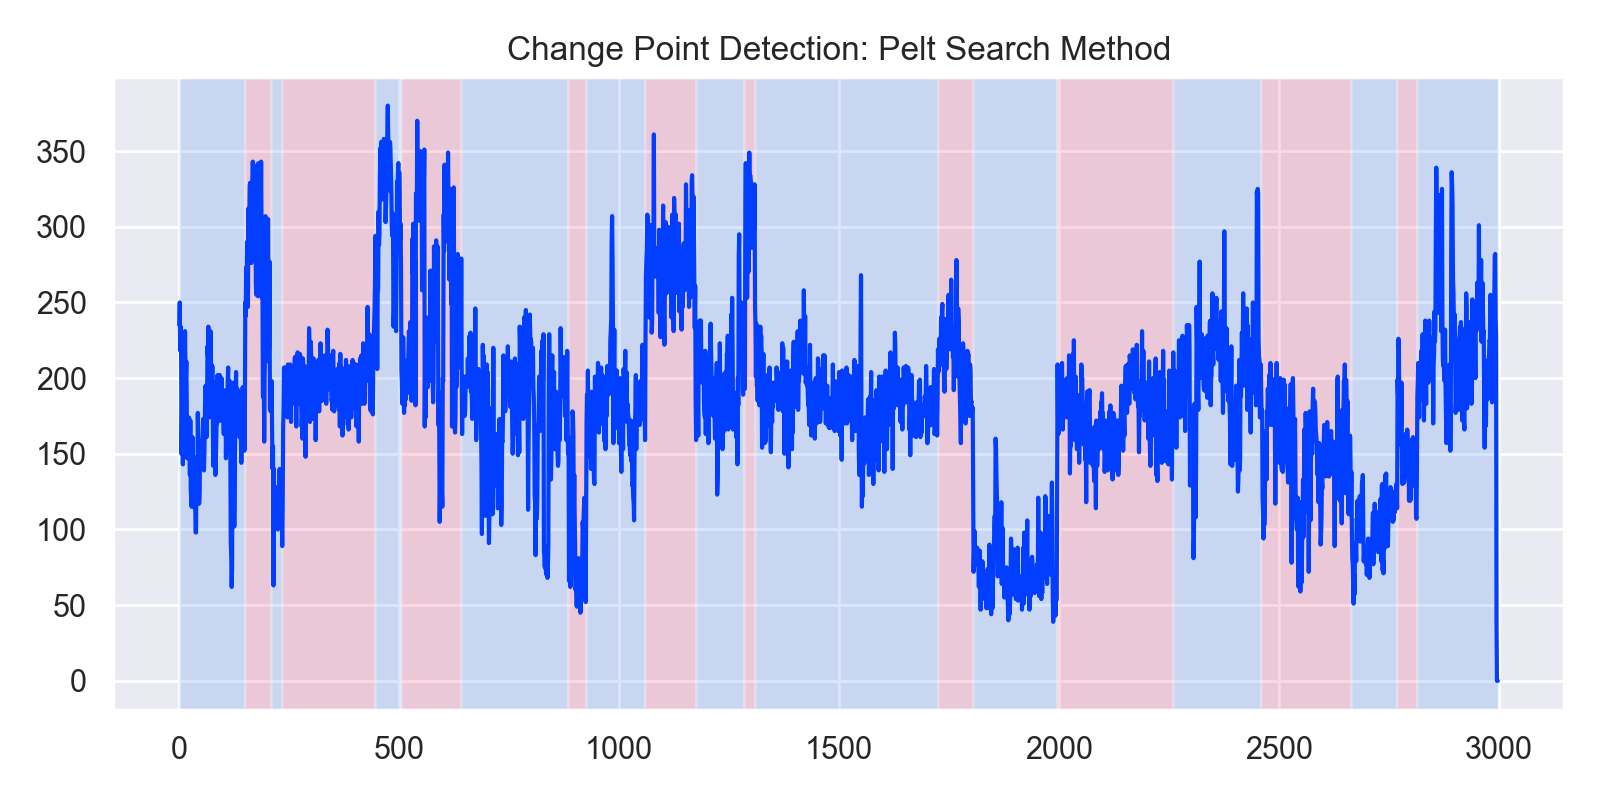

In [17]:
#Convert the time series values to a numpy 1D array
points = df.y.values

#RUPTURES PACKAGE

#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(points, my_bkps, figsize=(8, 4))
plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.tight_layout()
plt.show()
    
#Changepoint detection with window-based search method
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(8, 4))
plt.title('Change Point Detection: Window-Based Search Method')
plt.tight_layout()
plt.show()

#Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(8, 4))
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.tight_layout()
plt.show()

#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(8, 4))
plt.title('Change Point Detection: Pelt Search Method')
plt.tight_layout()
plt.show()  